In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("marketing_campaign.csv",sep='\t')

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Content Attributes

### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

### Promotions

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Places

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## EDA

In [6]:
df["TotalAmountSpent"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntSweetProducts"] + df["MntMeatProducts"] + df["MntWines"]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We need to convert year birth to an age feature

In [8]:
from datetime import datetime

In [9]:
df["Year_Birth"]

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [10]:
df["Age"] = df["Year_Birth"].apply(lambda x : datetime.now().year - x)
df["Age"]

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2240, dtype: int64

In [11]:
df["Age"].describe()

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

#### Age Distribution

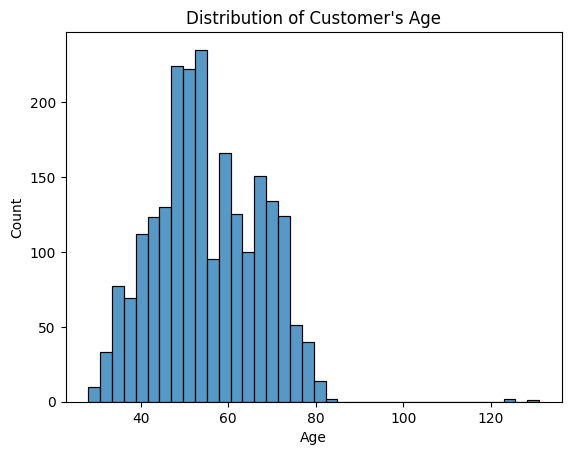

In [12]:
sns.histplot(data=df, x="Age")
plt.title("Distribution of Customer's Age")
plt.show()

In [13]:
df["Education"]

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: object

In [14]:
df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [15]:
df["Education"] = df["Education"].replace({"Graduation":"Graduate", "PhD":"Postgraduate", "Master":"Postgraduate", "2n Cycle":"Postgraduate", "Basic":"Undergraduate"})

In [16]:
df["Education"].value_counts()

Education
Graduate         1127
Postgraduate     1059
Undergraduate      54
Name: count, dtype: int64

#### Education effect on purchase

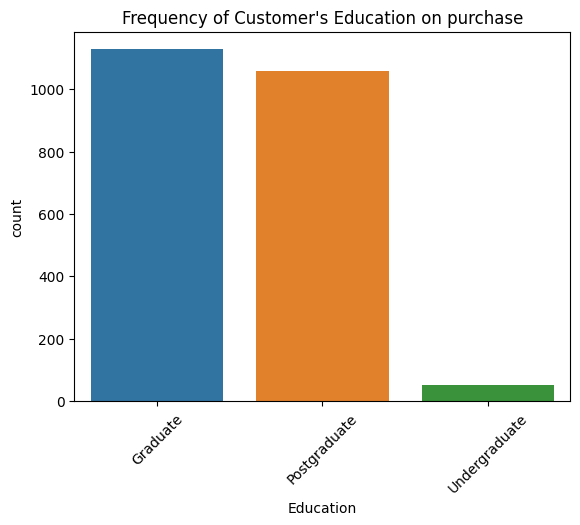

In [17]:
sns.countplot(x=df['Education'])
plt.xticks(rotation=45)
plt.title("Frequency of Customer's Education on purchase")
plt.show()

In [18]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [19]:
df["Marital_Status"] = df["Marital_Status"].replace({"Together":"Married", "Absurd":"Single", "Divorced":"Single", "Alone":"Single", "YOLO":"Single", "Widow":"Single"})

In [20]:
df["Marital_Status"].unique()

array(['Single', 'Married'], dtype=object)

#### Maritial Status

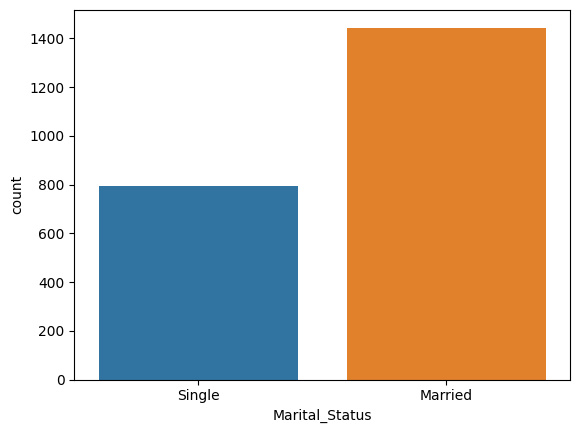

In [21]:
sns.countplot(x=df["Marital_Status"])
plt.show()

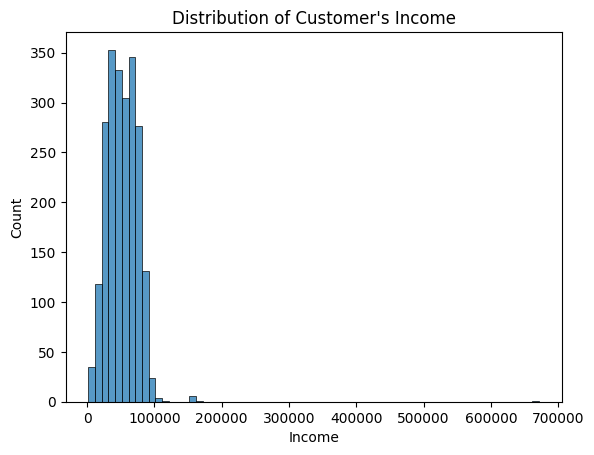

In [22]:
sns.histplot(data=df, x="Income", binwidth=1e4)
plt.title("Distribution of Customer's Income");

In [23]:
df["Kidhome"].unique()

array([0, 1, 2], dtype=int64)

#### Kids Influence on Purchases

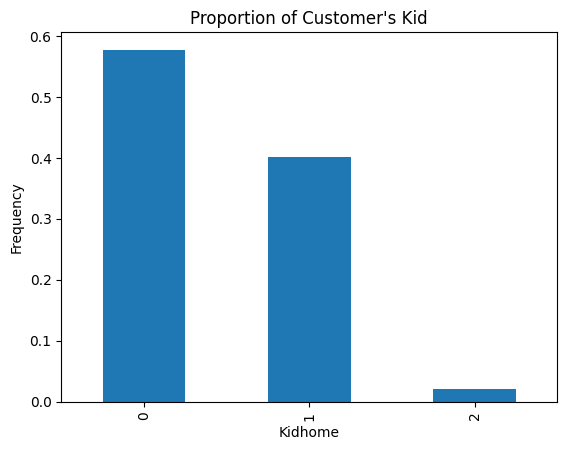

In [24]:
df["Kidhome"].value_counts(normalize=True).plot.bar()
plt.ylabel("Frequency")
plt.title("Proportion of Customer's Kid");

In [25]:
df["Teenhome"].unique()

array([0, 1, 2], dtype=int64)

#### Proportion of Teens at Home

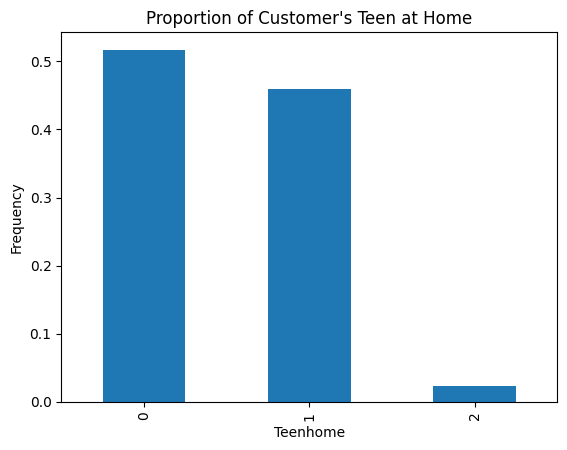

In [26]:
df["Teenhome"].value_counts(normalize=True).plot.bar()
plt.ylabel("Frequency")
plt.title("Proportion of Customer's Teen at Home");

#### Total Children

In [27]:
df["Total Children"] = df["Kidhome"] + df["Teenhome"]
df["Total Children"].unique()

array([0, 2, 1, 3], dtype=int64)

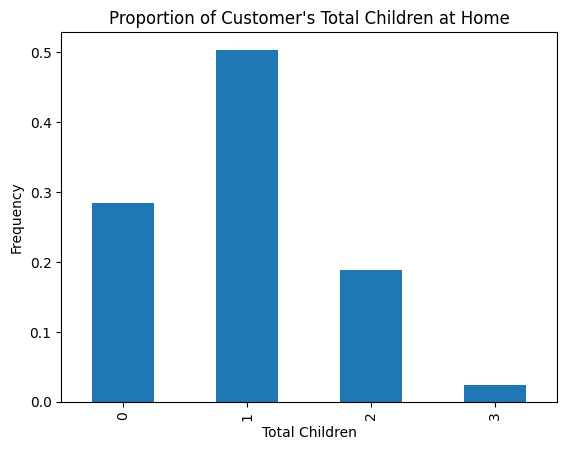

In [28]:
df["Total Children"].value_counts(normalize=True).sort_index().plot.bar()
plt.ylabel("Frequency")
plt.title("Proportion of Customer's Total Children at Home");

#### Total Spent

In [29]:
df["TotalAmountSpent"].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: TotalAmountSpent, dtype: float64

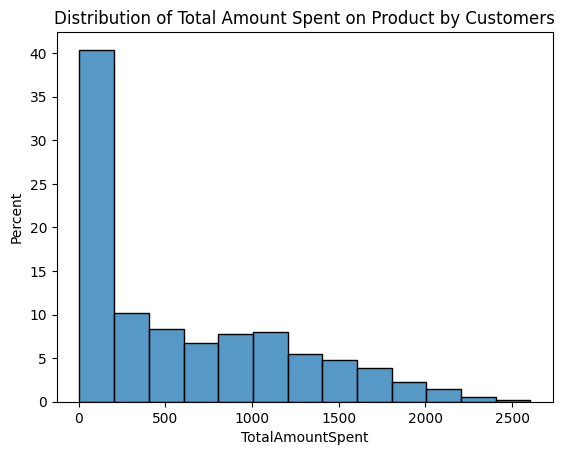

In [30]:
sns.histplot(data=df, x="TotalAmountSpent", binwidth=200, stat="percent")
plt.title("Distribution of Total Amount Spent on Product by Customers");

### Bivariate Analysis

**Age VS Total Amount Spent**

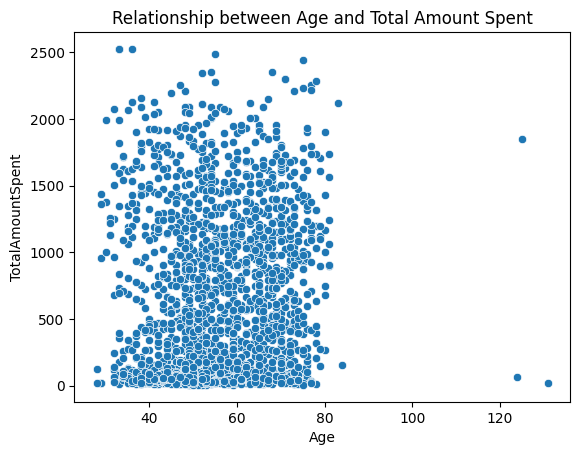

In [31]:
sns.scatterplot(data=df, x="Age", y="TotalAmountSpent")
plt.title("Relationship between Age and Total Amount Spent");

In [32]:
def group_age(age):
    if age <20:
        return "11-20"
    elif age > 20 and age <31:
        return "21-30"
    elif age > 30 and age <41:
        return "31-40"
    elif age > 40 and age <51:
        return "41-50"
    elif age > 50 and age <61:
        return "51-60"
    elif age > 60 and age <71:
        return "61-70"
    elif age > 70 and age <81:
        return "71-80"
    elif age > 80:
        return ">80"

In [33]:
df["Age Group"] =df["Age"].apply(group_age)

# To order plotly index
order = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80"]

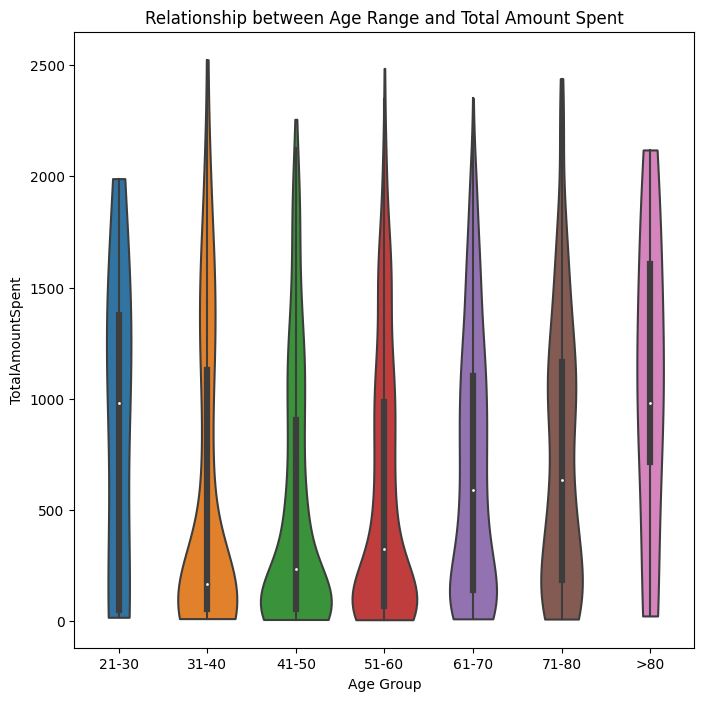

In [34]:
plt.figure(figsize=(8, 8))
sns.violinplot(x="Age Group", y="TotalAmountSpent", data=df, cut=0, order=order)
plt.title("Relationship between Age Range and Total Amount Spent");

**Education VS Total Amount Spent**

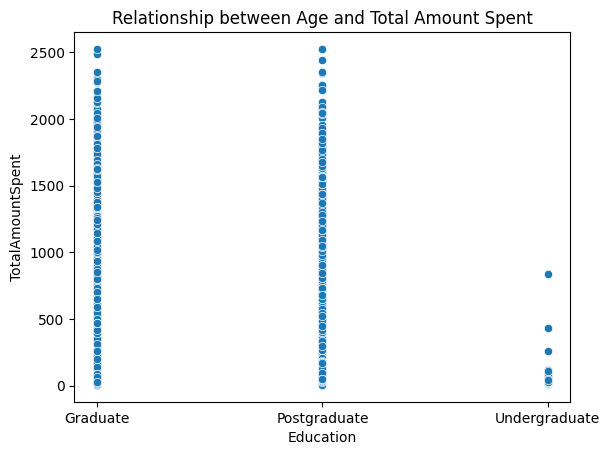

In [35]:
sns.scatterplot(data=df, x="Education", y="TotalAmountSpent")
plt.title("Relationship between Age and Total Amount Spent");

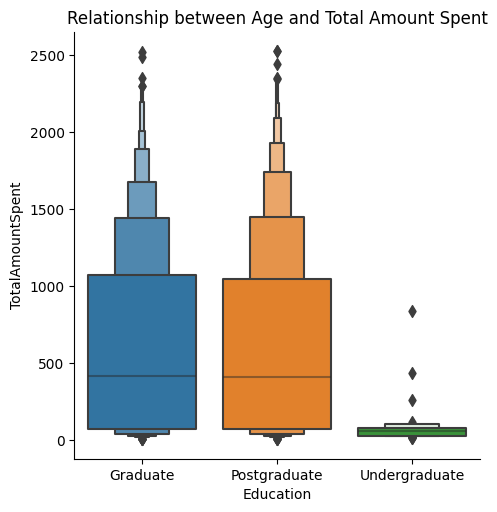

In [36]:
sns.catplot(data=df,x='Education',y='TotalAmountSpent',kind='boxen')
plt.title("Relationship between Age and Total Amount Spent");

**Income VS Total AmountSpent**

Text(0.5, 1.0, "Relationship Between Customer's Income and Total Amount Spent")

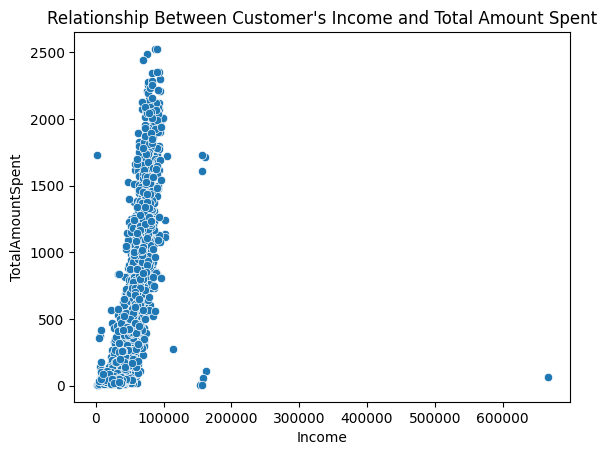

In [37]:
sns.scatterplot(data=df,x='Income', y="TotalAmountSpent")
plt.title("Relationship Between Customer's Income and Total Amount Spent")

**Education vs Income**

Text(0.5, 1.0, "Relationsip Between Customer's Education Level and Income")

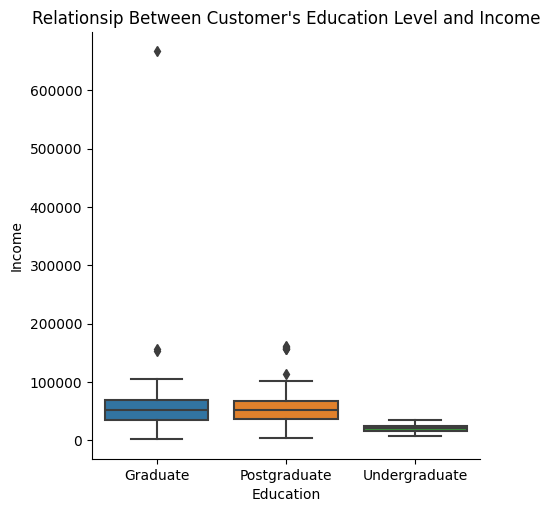

In [38]:
sns.catplot(data=df,y='Income', x="Education",kind='box')
plt.title("Relationsip Between Customer's Education Level and Income")

**Marital Status and Income**

Text(0.5, 1.0, "Relationship between Customer's Marital Status and Income")

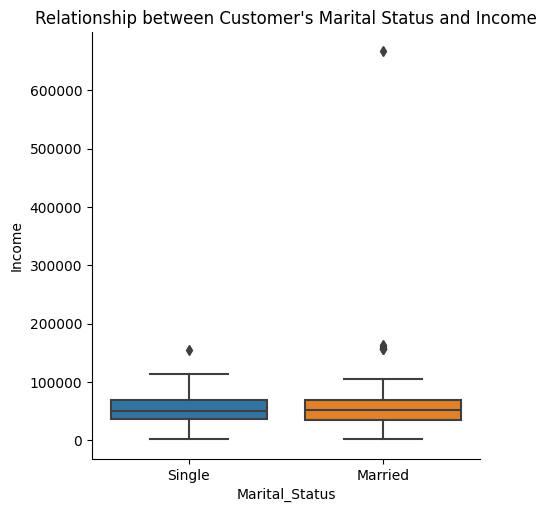

In [39]:
sns.catplot(data=df,x="Marital_Status",y='Income',kind='box')
plt.title("Relationship between Customer's Marital Status and Income")

### Multivariate Analysis

Text(0.5, 1.0, 'Relationship between Income VS Total Amount Spent Based on Education')

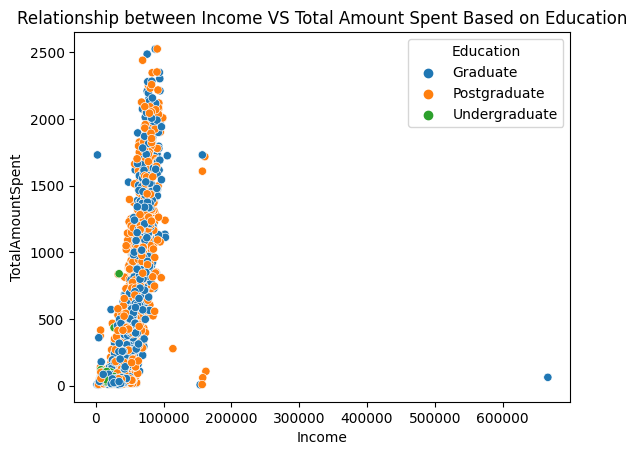

In [40]:
sns.scatterplot(data=df,x='Income',y="TotalAmountSpent",hue='Education')
plt.title("Relationship between Income VS Total Amount Spent Based on Education")

Text(0.5, 1.0, 'Total Amount Spent vs Age,Income and Education')

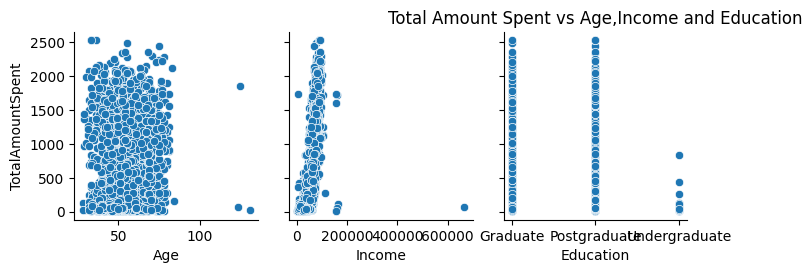

In [41]:
sns.pairplot(data=df,y_vars='TotalAmountSpent',x_vars=['Age','Income','Education'])
plt.title("Total Amount Spent vs Age,Income and Education")

There are many features in the dataset – but because we want to focus on customer demographics and behavior, we age,income and totalamountspent for building a clustering

### Building the KMeans Model

In [42]:
df["Income"].fillna(df["Income"].median(), inplace=True)

In [43]:
data = df[["Age", "Income", "TotalAmountSpent"]]

he features you're fitting into KMeans must be normally distributed. This is because KMeans (since it calculates average distance) is affected by outliers (values that deviate a lot from the others). As a result, any skewed feature must be changed in order to be normally distributed. Fortunately, we can use Numpy's logarithm transformation package np.log()

The features must also be of the same scale. For this, we'll use the Scikit-learn StandardScaler() module.


In [44]:
df_log = np.log(data)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

In [45]:
sse = {}
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    sse[k] = model.inertia_

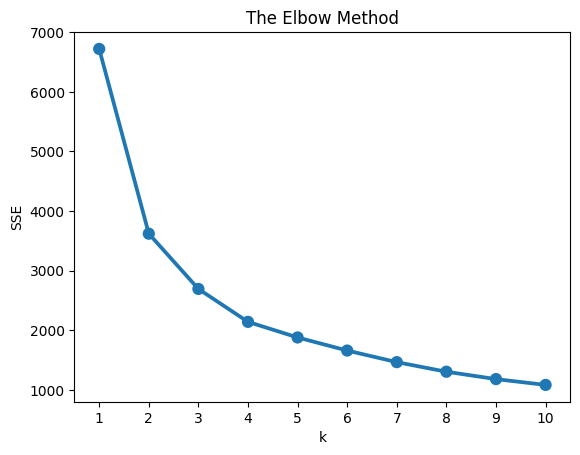

In [46]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [47]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)
data = data.assign(ClusterLabel= model.labels_)

**How to Interpret the Cluster Result**


Now that we've built the model, the next thing will be to interpret the result from each cluster.

There are numerous way you can summarize the results of your cluster depending on what you want to achieve. The most common summary is using central tendency which includes mean, median, and mode.

For our case we will make use of median. We're using median because the original features have outliers and the mean is very sensitive to outliers.

So we will aggregate the cluster labels and find the median for Income and TotalAmountSpent and mean for age. We can make use of Pandas groupby method for that.

In [48]:
result = data.groupby("ClusterLabel").agg({"Age":"mean", "Income":"median", "TotalAmountSpent":"median"}).round()

In [49]:
result

,Age,Income,TotalAmountSpent
ClusterLabel,,,
0,51.0,31801.0,54.0
1,67.0,62814.0,822.0
2,46.0,67402.0,1001.0


**Interpreting the Cluster Result**

- Cluster 1 depicts middle age customers that earn lows and also spend low.
- Cluster 2 translates to old customer that earn lot and also spend moderately high.
- Cluster 3 depicts young customers that earn lot and also spend high.

### Conclusion:

In this project, I conducted exploratory data analysis (EDA) on the dataset, focusing on features related to age, income, and the amount spent on purchases. Following the EDA, I applied the KMeans clustering algorithm to segment customers based on these features. To enhance the clustering performance, I utilized hyperparameter tuning to optimize the KMeans algorithm. By selecting appropriate features and fine-tuning the clustering algorithm, I successfully identified distinct customer segments. These segments provide valuable insights into customer behavior and preferences, enabling targeted marketing strategies and personalized customer experiences.